## Ankur Srivastava 19A3HP672
## Q3 Cluster Analysis

In [1]:
# importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
# loading dataset
customers_df=pd.read_csv(r"C:\Users\Ankur Srivastava\Documents\IMT\MLAP\MLAP ET DATASETS 21 Sep 2020\2_customerspends.csv")

In [4]:
# first five rows
customers_df.head(5)

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.7
1,2,15.23,5.5
2,3,5.22,18.6
3,4,31.10,1.8
4,5,6.12,21.5


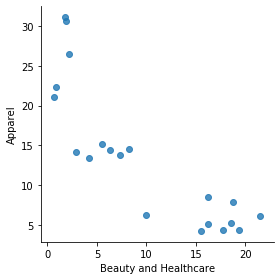

In [5]:
sn.lmplot("Beauty and Healthcare","Apparel",data=customers_df,fit_reg=False,size=4);
#plt.title( "Fig 1: Customer Segments Based on Apparel and Beauty and Healthcare");


## K-means Clustering

In [6]:
# importing clustering libraries
from sklearn.cluster import KMeans
clusters=KMeans(3)
clusters.fit(customers_df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
# number of clusters that exist in dataset is 3 maximum iteration is 300

In [8]:
# dividing customers based on cluster id
customers_df["clusterid"]=clusters.labels_

In [9]:
customers_df[0:5]

,Customer,Apparel,Beauty and Healthcare,clusterid
0,1,21.10,0.7,0
1,2,15.23,5.5,2
2,3,5.22,18.6,1
3,4,31.10,1.8,0
4,5,6.12,21.5,1


## Plotting the customers with their segments

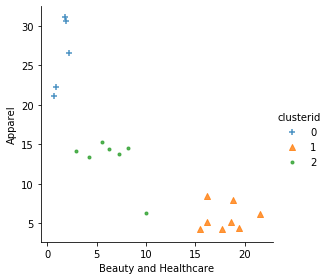

In [10]:
markers=['+','^','.']
sn.lmplot("Beauty and Healthcare","Apparel",
data=customers_df,
hue="clusterid",
fit_reg=False,
markers=markers,
size=4);

## Normalizing the features

In [11]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaled_customers_df=scaler.fit_transform(customers_df[["Beauty and Healthcare","Apparel"]])
scaled_customers_df[0:5]

array([[-1.26688022,  0.892371  ],
       [-0.59775334,  0.20647107],
       [ 1.22840542, -0.96318111],
       [-1.11353864,  2.06085469],
       [ 1.63266957, -0.85801758]])

In [12]:
# importing kmeans for reverifying the asumptions
from sklearn.cluster import KMeans
clusters_new=KMeans(3,random_state=42)
clusters_new.fit(scaled_customers_df)
customers_df["clusterid_new"]=clusters_new.labels_


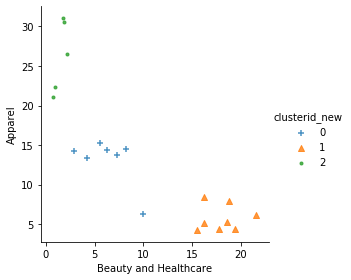

In [13]:

markers=['+','^','.']
sn.lmplot("Beauty and Healthcare","Apparel",
data=customers_df,
hue="clusterid_new",
fit_reg=False,markers=markers,size=4);
#plt.title( "Fig 3: Customer segments created after normalization");


In [14]:
# array based upon distance from centre to cluster centre
clusters.cluster_centers_

array([[ 9.2       , 26.32      ,  1.5       ],
       [ 9.75      ,  5.74125   , 17.9875    ],
       [12.28571429, 13.10428571,  6.33714286]])

## Cluster Centers and Interpreting the Clusters

In [15]:
customers_df.groupby('clusterid')['Beauty and Healthcare','Apparel'].agg(["mean",'std']).reset_index()

clusterid Beauty and Healthcare              Apparel          
                             mean       std       mean       std
0         0              1.500000  0.659545  26.320000  4.599130
1         1             17.987500  2.001027   5.741250  1.646003
2         2              6.337143  2.406697  13.104286  3.077655

## Creating Product Segments

In [16]:
# reading the dataset
customer_df=pd.read_csv(r'C:\Users\Ankur Srivastava\Documents\IMT\MLAP\MLAP ET DATASETS 21 Sep 2020\2_customerspends.csv')

In [17]:
# seeing observations recorded
customer_df

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.70
1,2,15.23,5.50
2,3,5.22,18.60
3,4,31.10,1.80
4,5,6.12,21.50
5,6,14.50,8.20
6,7,8.50,16.20
7,8,26.50,2.20
8,9,4.34,17.70
9,10,13.75,7.30


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_customer_df=scaler.fit_transform(customer_df[['Customer','Apparel','Beauty and Healthcare']])

## No. of Clusters - Using Dendrogram

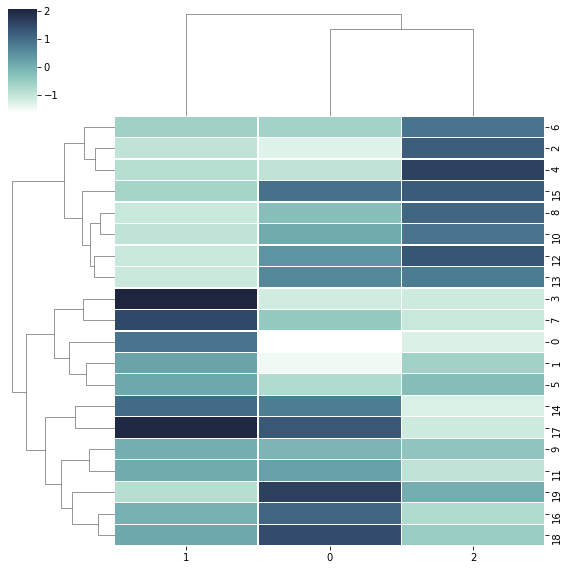

In [19]:
cmap=sn.cubehelix_palette(as_cmap=True,rot=-.3,light=1)
sn.clustermap(scaled_customer_df,cmap=cmap,linewidths=.2,
figsize=(8,8));
#plt.title( "Fig 4: Dendrogram of Customerspends Dataset");

In [20]:
# verified from dendogram actual clusters are 3


In [21]:
customer_df.iloc[[10,16]]
# verifying cluster of customer 11 & 17

,Customer,Apparel,Beauty and Healthcare
10,11,5.2,16.2
16,17,13.4,4.2


In [22]:
customer_df.iloc[[2,18]]

,Customer,Apparel,Beauty and Healthcare
2,3,5.22,18.60
18,19,14.40,6.28


## Finding Optimal Number of Clusters using Elbow Method

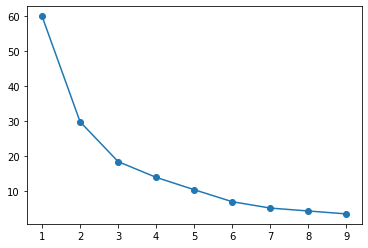

In [23]:
cluster_range=range(1,10)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(scaled_customer_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_errors,marker="o");
#plt.title( "Fig 5: Elbow Diagram");

## Normalizing Features - Rescaling the dataset

In [24]:
scaler=StandardScaler()
scaled_customer_df=scaler.fit_transform(customer_df[['Customer','Apparel','Beauty and Healthcare']])

## Creating Clusters

In [25]:
k=3
clusters=KMeans(k,random_state=42)
clusters.fit(scaled_customer_df)
customer_df["clusterid"]=clusters.labels_

## Interpreting the Clusters

In [26]:
# cluster 0
customer_df[customer_df.clusterid==0]

,Customer,Apparel,Beauty and Healthcare,clusterid
9,10,13.75,7.30,0
11,12,14.20,2.90,0
14,15,22.30,0.90,0
16,17,13.40,4.20,0
17,18,30.60,1.90,0
18,19,14.40,6.28,0
19,20,6.25,9.98,0


In [27]:
# cluster 1
customer_df[customer_df.clusterid==1]

,Customer,Apparel,Beauty and Healthcare,clusterid
2,3,5.22,18.6,1
4,5,6.12,21.5,1
6,7,8.50,16.2,1
8,9,4.34,17.7,1
10,11,5.20,16.2,1
12,13,4.40,19.4,1
13,14,4.25,15.5,1
15,16,7.90,18.8,1


In [28]:
# cluster 2
customer_df[customer_df.clusterid==2]

,Customer,Apparel,Beauty and Healthcare,clusterid
0,1,21.10,0.7,2
1,2,15.23,5.5,2
3,4,31.10,1.8,2
5,6,14.50,8.2,2
7,8,26.50,2.2,2


## Hierarchical Clustering

In [29]:
# importing agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

In [30]:
h_clusters = AgglomerativeClustering(3)
h_clusters.fit(scaled_customer_df)
customer_df["h_clusterid"]=h_clusters.labels_

In [31]:
# cluster 0
customer_df[customer_df.h_clusterid == 0]

,Customer,Apparel,Beauty and Healthcare,clusterid,h_clusterid
9,10,13.75,7.30,0,0
11,12,14.20,2.90,0,0
14,15,22.30,0.90,0,0
16,17,13.40,4.20,0,0
17,18,30.60,1.90,0,0
18,19,14.40,6.28,0,0
19,20,6.25,9.98,0,0


In [32]:
# cluster 1
customer_df[customer_df.h_clusterid==1]

,Customer,Apparel,Beauty and Healthcare,clusterid,h_clusterid
2,3,5.22,18.6,1,1
4,5,6.12,21.5,1,1
6,7,8.50,16.2,1,1
8,9,4.34,17.7,1,1
10,11,5.20,16.2,1,1
12,13,4.40,19.4,1,1
13,14,4.25,15.5,1,1
15,16,7.90,18.8,1,1


In [33]:
# cluster 2
customer_df[customer_df.h_clusterid==2]

,Customer,Apparel,Beauty and Healthcare,clusterid,h_clusterid
0,1,21.10,0.7,2,2
1,2,15.23,5.5,2,2
3,4,31.10,1.8,2,2
5,6,14.50,8.2,2,2
7,8,26.50,2.2,2,2


In [34]:
# hence it is verified that number of cluster initially existing in the dataset i.e. 3 
#is true and the same is verified from K means algorithm using elbow drop method and dendogram method.